Problem Statement: The dataset contain details of users like User ID, Gender, Age, EstimatedSalary and Purchased. The data shows whether a person is likely to purchase the artefacts advertised or not. Based on the data we have to generate a model that can predict whether the person will make a purchase or not.

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [3]:
#Read Data
ad_data=pd.read_csv('Social_Network_Ads.csv')
print(ad_data.head())
ad_data.shape

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


(400, 5)

In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
ad_data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
#Label Encoding
le=LabelEncoder()
ad_data['Gender']=le.fit_transform(ad_data['Gender'])
print(ad_data)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510       1   19            19000          0
1    15810944       1   35            20000          0
2    15668575       0   26            43000          0
3    15603246       0   27            57000          0
4    15804002       1   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863       0   46            41000          1
396  15706071       1   51            23000          1
397  15654296       0   50            20000          1
398  15755018       1   36            33000          0
399  15594041       0   49            36000          1

[400 rows x 5 columns]


In [7]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int32
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int32(1), int64(4)
memory usage: 14.2 KB


In [9]:
#Scalling on Numerical Data
sc=StandardScaler()
ad_data[['Age','EstimatedSalary']]=sc.fit_transform(ad_data[['Age','EstimatedSalary']])
print(ad_data)

      User ID  Gender       Age  EstimatedSalary  Purchased
0    15624510       1 -1.781797        -1.490046          0
1    15810944       1 -0.253587        -1.460681          0
2    15668575       0 -1.113206        -0.785290          0
3    15603246       0 -1.017692        -0.374182          0
4    15804002       1 -1.781797         0.183751          0
..        ...     ...       ...              ...        ...
395  15691863       0  0.797057        -0.844019          1
396  15706071       1  1.274623        -1.372587          1
397  15654296       0  1.179110        -1.460681          1
398  15755018       1 -0.158074        -1.078938          0
399  15594041       0  1.083596        -0.990844          1

[400 rows x 5 columns]


In [ ]:
#DIY----check Z score and transformation

In [10]:
#Seperating Independent and dependent Variables
x=ad_data[['Gender','Age','EstimatedSalary']]
y=ad_data['Purchased']

In [13]:
#Train-Test Split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(320, 3) (80, 3)
(320,) (80,)


In [14]:
#Train Logistic Regression model
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [17]:
#Checking Prediction and Accuracy on Train (Known data)
y_pred=log_reg.predict(x_train)
print(y_pred)
print("Train Accuracy:",metrics.accuracy_score(y_train,y_pred))

[1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0
 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1
 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1
 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0
 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0
 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0]
Train Accuracy: 0.8375


In [19]:
#Checking Prediction and Accuracy on Test (Unknown data)
y_pred=log_reg.predict(x_test)
print(y_pred)
print("Test Accuracy:",metrics.accuracy_score(y_test,y_pred))

[0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0
 1 1 0 0 0 0]
Test Accuracy: 0.7875


In [20]:
print(log_reg.predict([[1,25,60000]]))

[1]


C:\Users\ajita\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


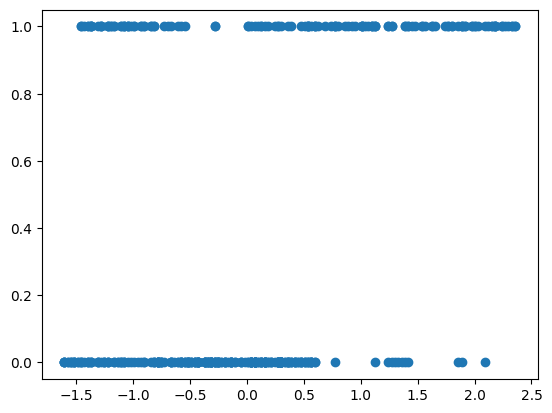

In [21]:
plt.scatter(ad_data['EstimatedSalary'],ad_data['Purchased'])
plt.show()